<a href="https://colab.research.google.com/github/amnakhan1221/EDA/blob/main/Hotel_booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset (you may need to upload manually in Colab via the UI or use files.upload())
from google.colab import files
uploaded = files.upload()

# Read the CSV
df = pd.read_csv('hotel_booking.csv')



Saving hotel_booking.csv to hotel_booking (1).csv


In [5]:
# --- Basic info ---
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape of dataset: (119390, 36)

Missing values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent   

In [6]:
# --- Drop unnecessary columns ---
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [7]:
# --- Handle missing values ---
df['children'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

<ipython-input-7-e5af631e65fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
<ipython-input-7-e5af631e65fa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [8]:
# --- Add total stays column ---
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [9]:
# --- Cancellations ---
cancel_rate = df['is_canceled'].value_counts(normalize=True) * 100
print("\nCancellation Rate:\n", cancel_rate)


Cancellation Rate:
 is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


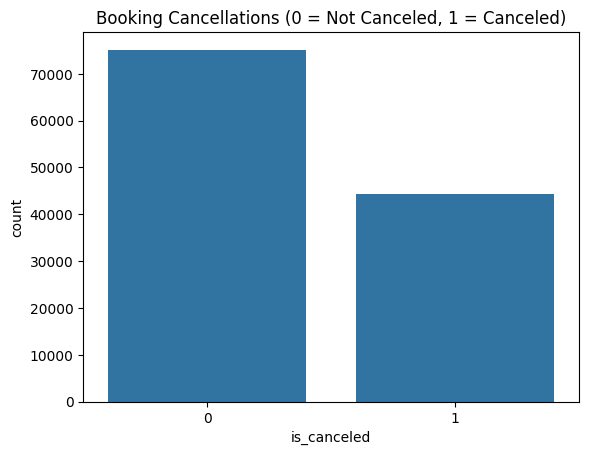

In [10]:
# Plot cancellations
sns.countplot(x='is_canceled', data=df)
plt.title("Booking Cancellations (0 = Not Canceled, 1 = Canceled)")
plt.show()

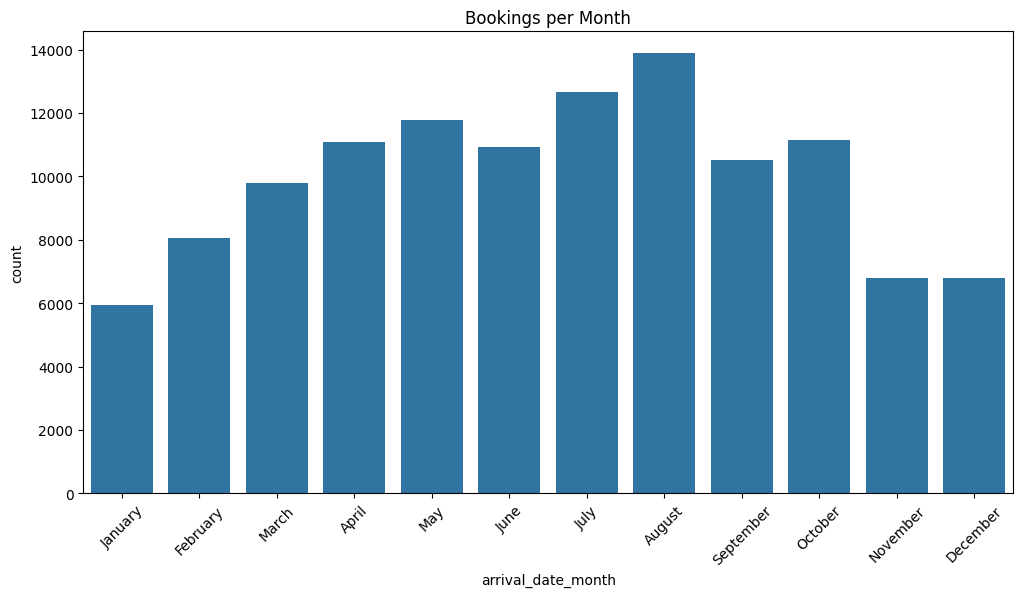

In [11]:
# --- Seasonality ---
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Bookings per Month")
plt.xticks(rotation=45)
plt.show()

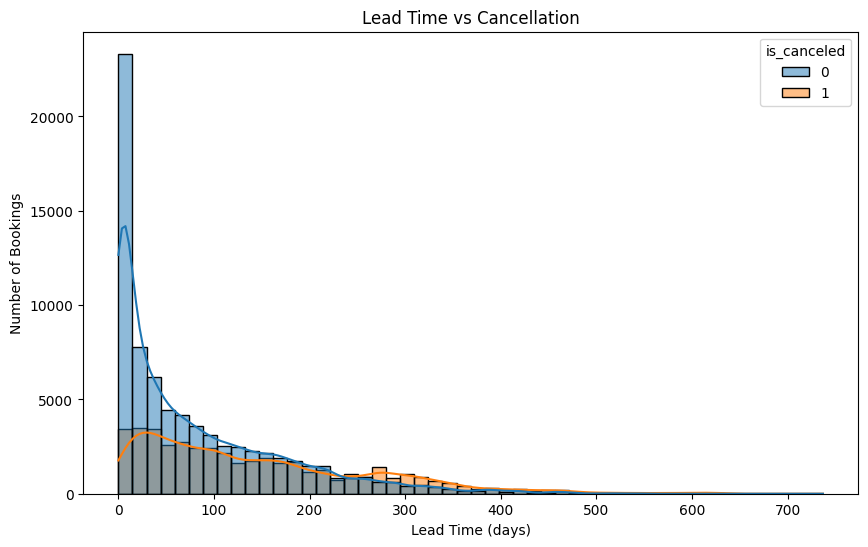

In [12]:
# --- Lead time vs Cancellation ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.show()

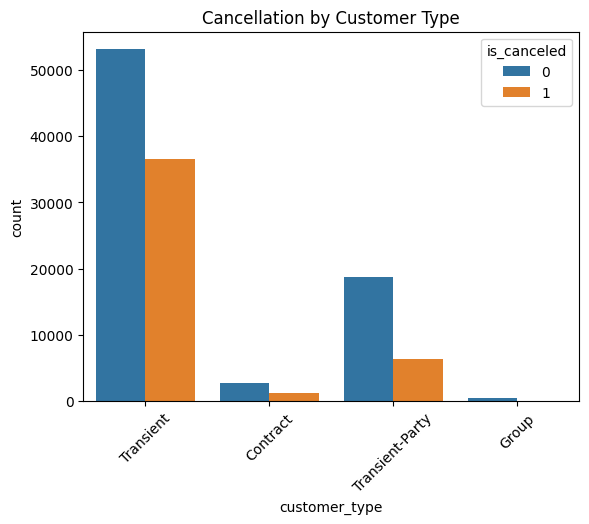

In [13]:
# --- Customer Type ---
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title("Cancellation by Customer Type")
plt.xticks(rotation=45)
plt.show()


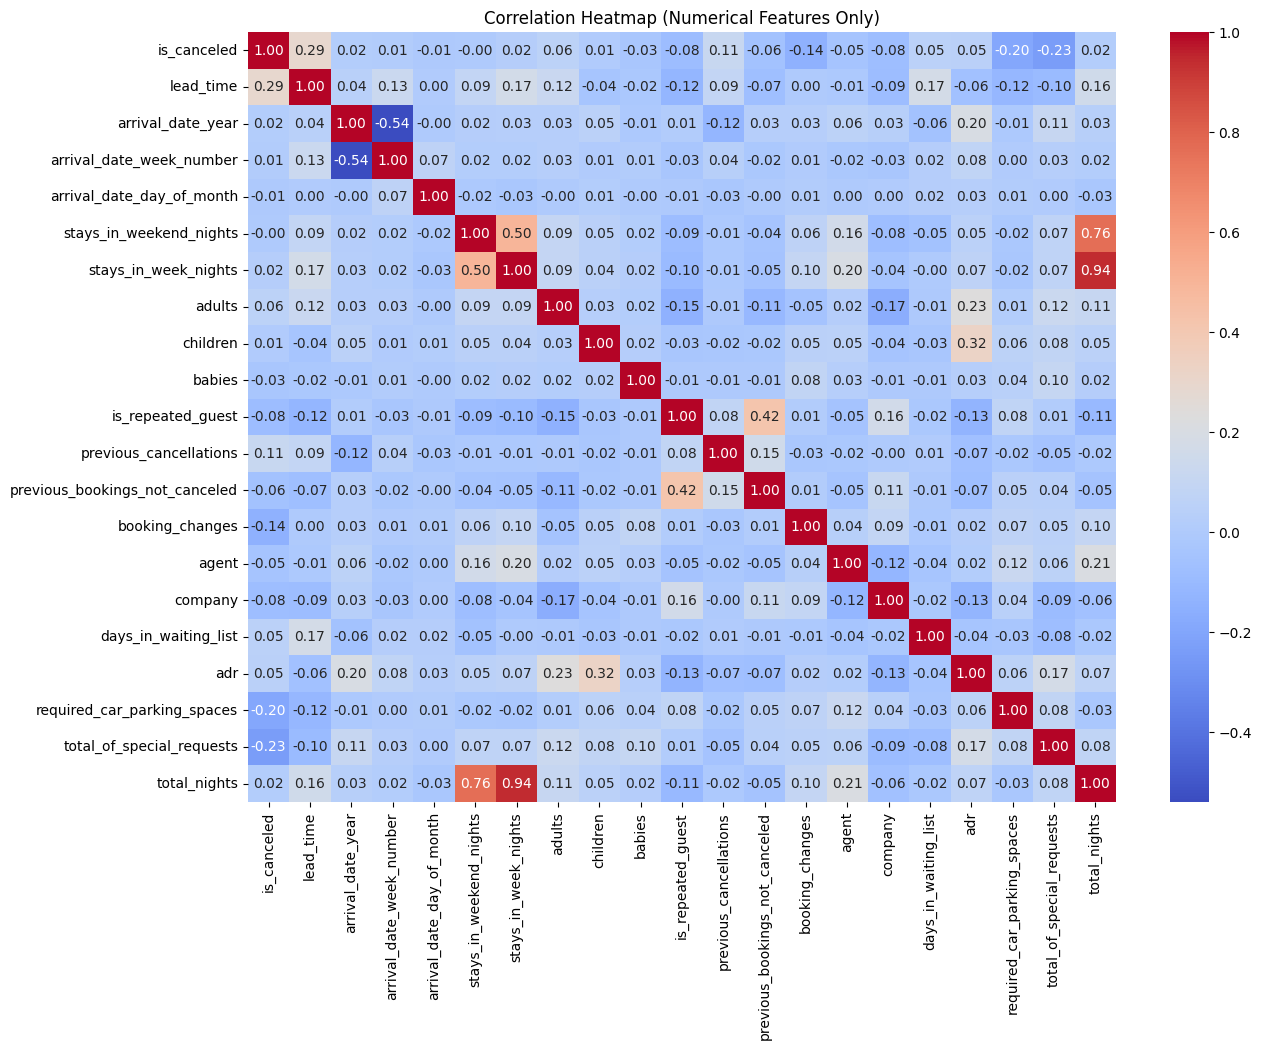

In [15]:
# --- Correlation Heatmap (numeric columns only) ---
plt.figure(figsize=(14, 10))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


Cancellation Rate by Hotel:
 hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


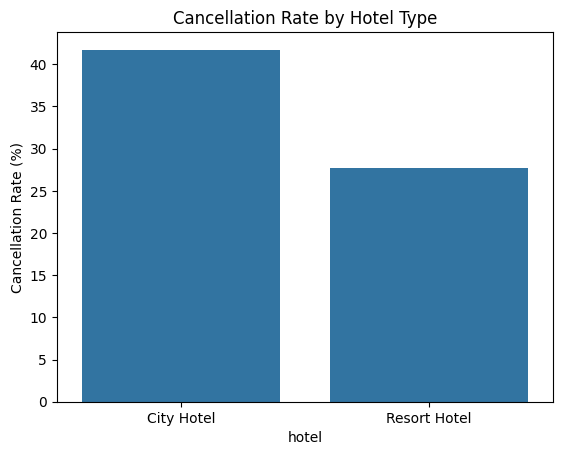

In [16]:
# Cancellation rate by hotel type
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
print("\nCancellation Rate by Hotel:\n", cancel_by_hotel)

# Visual
sns.barplot(x=cancel_by_hotel.index, y=cancel_by_hotel.values)
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.show()


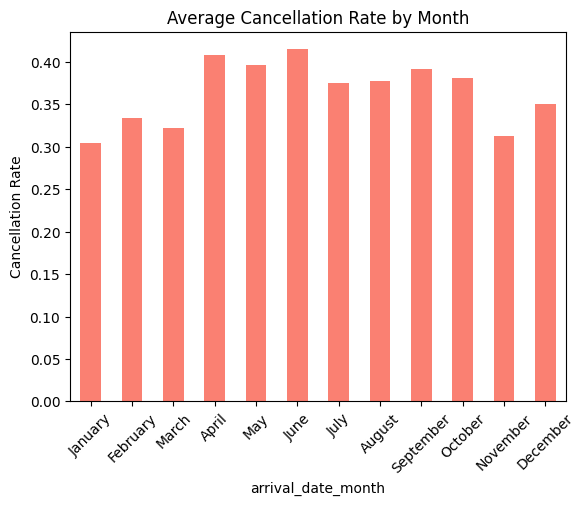

In [17]:
# Monthly cancellation trend
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_cancellation.plot(kind='bar', color='salmon')
plt.title("Average Cancellation Rate by Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.show()


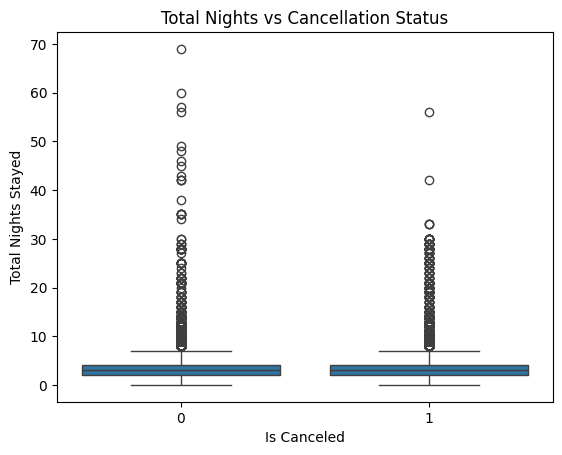

In [18]:
# Average length of stay by cancellation status
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

sns.boxplot(x='is_canceled', y='total_nights', data=df)
plt.title("Total Nights vs Cancellation Status")
plt.xlabel("Is Canceled")
plt.ylabel("Total Nights Stayed")
plt.show()


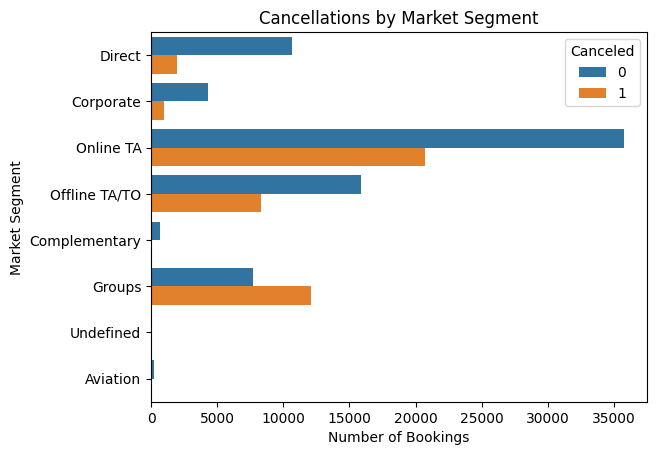

In [19]:
# Market segment by cancellation
sns.countplot(data=df, y='market_segment', hue='is_canceled')
plt.title("Cancellations by Market Segment")
plt.xlabel("Number of Bookings")
plt.ylabel("Market Segment")
plt.legend(title="Canceled")
plt.show()


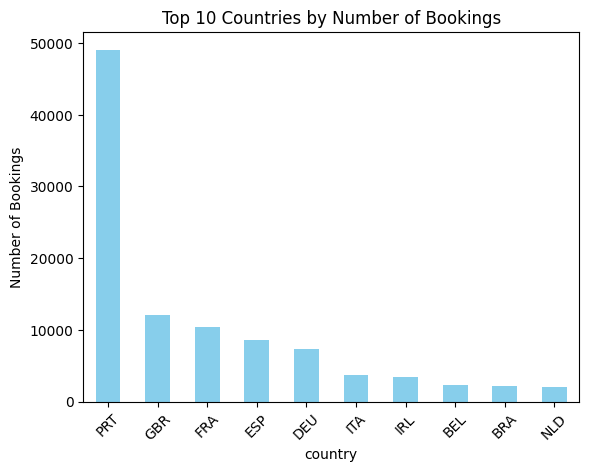

In [20]:
# Top 10 countries by bookings
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Number of Bookings")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


In [21]:
df.to_csv("cleaned_hotel_bookings.csv", index=False)
